In [2]:
%matplotlib notebook 
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from scipy.special import logsumexp
#%matplotlib qt5
#plt.rcParams.update({'figure.figsize': (20.0, 6.0), 'font.size': 18})

## Gaussian distribution 
* probability density finction

$$
\large
\DeclareMathOperator{\Norm}{\mathcal{N}}
\DeclareMathOperator{\Gam}{Gam}
\DeclareMathOperator{\e}{exp}
p(x \mid \mu, \sigma^2) = \Norm(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \e\left\{ \frac{-(x - \mu)^2}{2\sigma^2} \right\}
$$

* Maximum likelihood estimate of Gaussian density paramters 

$$
\large
\begin{align}
\mu &= \frac{1}{N} \sum_i x_i \\
\sigma^2 &= \frac{1}{N} \sum_i x_i^2
\end{align}
$$

In [7]:
from matplotlib.widgets import Slider, Button, RadioButtons
fig, ax = plt.subplots()
plt.subplots_adjust(top=0.8, bottom=0.25)

# Plot Gaussian distribution
mu = 0    # mean
sigma = 1 # standard deviation (std)
t = np.linspace(-5,5,1000)
plt.plot(t, sps.norm.pdf(t, mu, sigma), 'k:',lw=3)

# Generate N samples from the distribution
N=20
x = sps.norm.rvs(mu, sigma, N)

# Plot Gaussian with parameters ML esimated on the samples 
mu_ml =np.mean(x)
sigma_ml = np.std(x)
p=plt.plot(t, sps.norm.pdf(t, mu_ml, sigma_ml), 'b')
plt.plot(x, np.zeros_like(x), '+', color=p[0].get_color())

# Plot Gaussian with parameters controled by sliders 
p1, = plt.plot(t, sps.norm.pdf(t, mu_ml, sigma_ml), 'r')
p2, = plt.plot(x, sps.norm.pdf(x, mu_ml, sigma_ml), 'ro')
ttl = plt.title('')

def update(val):
    p1.set_ydata(sps.norm.pdf(t, smu.val, ssigma.val))
    p2.set_ydata(sps.norm.pdf(x, smu.val, ssigma.val))
    ttl.set_text(r'''$\prod_n\mathcal{N}(x_n;\mu, \sigma^2)=$%g
$\sum_n\log\mathcal{N}(x_n;\mu, \sigma^2)=$%g'''\
% (np.prod(sps.norm.pdf(x, smu.val, ssigma.val)),np.sum(np.log(sps.norm.pdf(x, smu.val, ssigma.val)))))
    fig.canvas.draw_idle()

smu    = Slider(plt.axes([0.12, 0.15, 0.78, 0.03]), r'$\mu$', -5, 5, valinit=mu_ml)
ssigma = Slider(plt.axes([0.12, 0.1, 0.78, 0.03]), r'$\sigma$', 0.01, 5, valinit=sigma_ml)

smu.on_changed(update)
ssigma.on_changed(update)
update(None)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


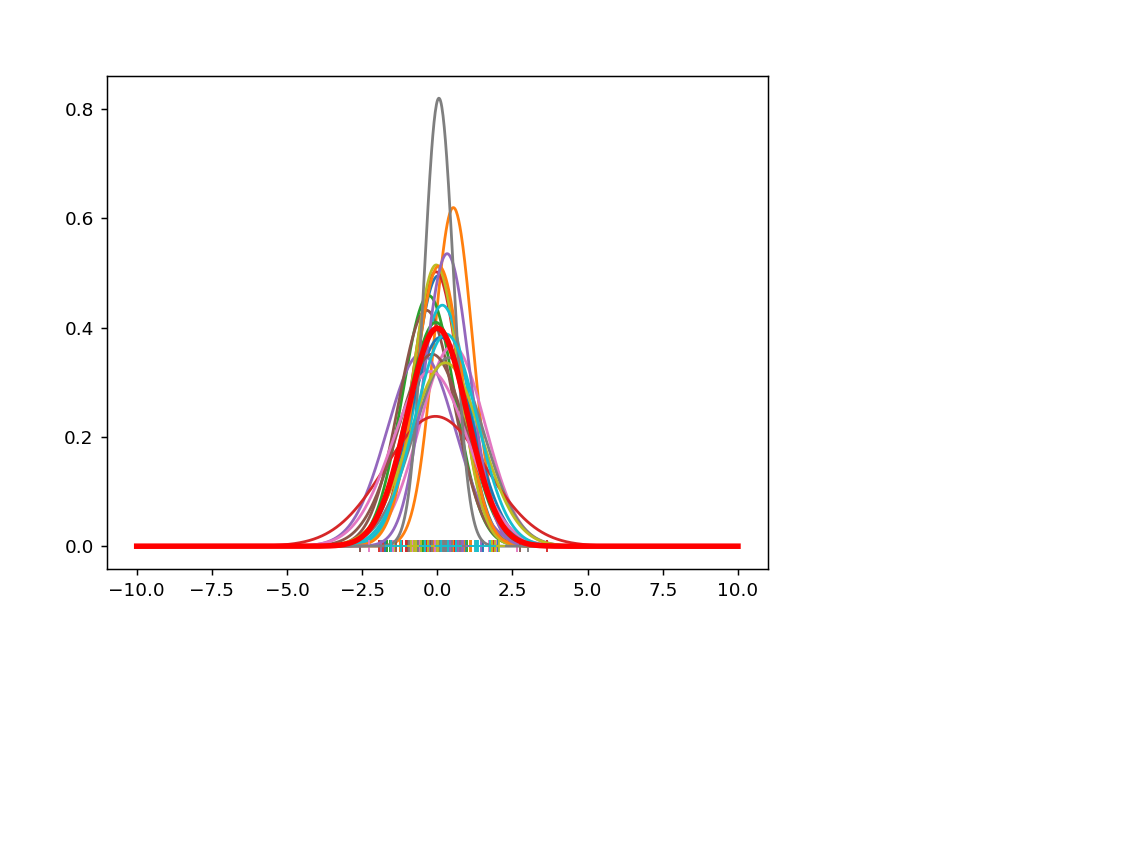

In [7]:
# Define gaussian distribution
mu = 0    # mean
sigma = 1 # standard deviation (std)
t = np.linspace(-10,10,1000)
plt.figure()

# Genereate data from this distribution and plot corresponding ML estimated distribution
# Repeat few times to see different model estimates for the different training data sets
N=10 # number of training observations
for i in range(20):
    x = sps.norm.rvs(mu, sigma, N)
    p=plt.plot(t, sps.norm.pdf(t, np.mean(x), np.std(x)))
    plt.plot(x, np.zeros_like(x), '+', color=p[0].get_color())

#Plot the "true" distribution
plt.plot(t, sps.norm.pdf(t, mu, sigma), 'r',lw=3)
